# multi level pie plots
https://github.com/jukuznets/jupyter-notebooks/blob/main/mpl-nested-pies.ipynb
https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
print(vals)

[[60. 32.]
 [37. 40.]
 [29. 10.]]


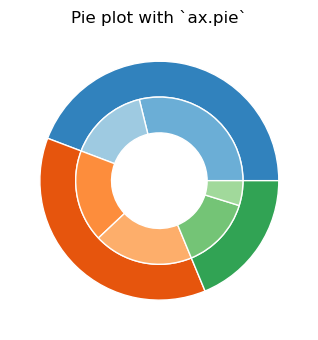

In [5]:
fig, ax = plt.subplots()

size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [9]:
# 2nd example
import pandas as pd

In [11]:
df = pd.DataFrame([['Bad', 'Male', 1542],
                   ['Good', 'Male', 1419],
                   ['Good', 'Female', 714],
                   ['Bad', 'Female', 419],
                   ['Neutral', 'Male', 254],
                   ['Neutral', 'Female', 138], 
                   ['Bad', 'Genderless', 9], 
                   ['Good', 'Genderless', 4],
                   ['Neutral', 'Genderless', 3], 
                   ['Reformed', 'Male', 2]])
df.columns = ['ALIGN', 'SEX', 'n']
df

,ALIGN,SEX,n
0,Bad,Male,1542
1,Good,Male,1419
2,Good,Female,714
3,Bad,Female,419
4,Neutral,Male,254
5,Neutral,Female,138
6,Bad,Genderless,9
7,Good,Genderless,4
8,Neutral,Genderless,3
9,Reformed,Male,2


In [12]:
#For the numbers in the outer ring, we can use a simple groupby, as you did:

outer = df.groupby('SEX').sum()
#But for the numbers in the inner ring, we need to group by both categorical variables, which results in a MultiIndex:

inner = df.groupby(['SEX', 'ALIGN']).sum()

C:\Users\du\AppData\Local\Temp\ipykernel_19640\4025571327.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outer = df.groupby('SEX').sum()


In [14]:
print(outer,  '\n', inner)

               n
SEX             
Female      1271
Genderless    16
Male        3217 
                         n
SEX        ALIGN         
Female     Bad        419
           Good       714
           Neutral    138
Genderless Bad          9
           Good         4
           Neutral      3
Male       Bad       1542
           Good      1419
           Neutral    254
           Reformed     2


In [16]:
#We can extract the appropriate labels from the MultiIndex with its get_level_values() method:

inner_labels = inner.index.get_level_values(1)
inner_labels

Index(['Bad', 'Good', 'Neutral', 'Bad', 'Good', 'Neutral', 'Bad', 'Good',
       'Neutral', 'Reformed'],
      dtype='object', name='ALIGN')

In [21]:
print(outer.values.flatten(), '\n', inner.values.flatten())

[1271   16 3217] 
 [ 419  714  138    9    4    3 1542 1419  254    2]


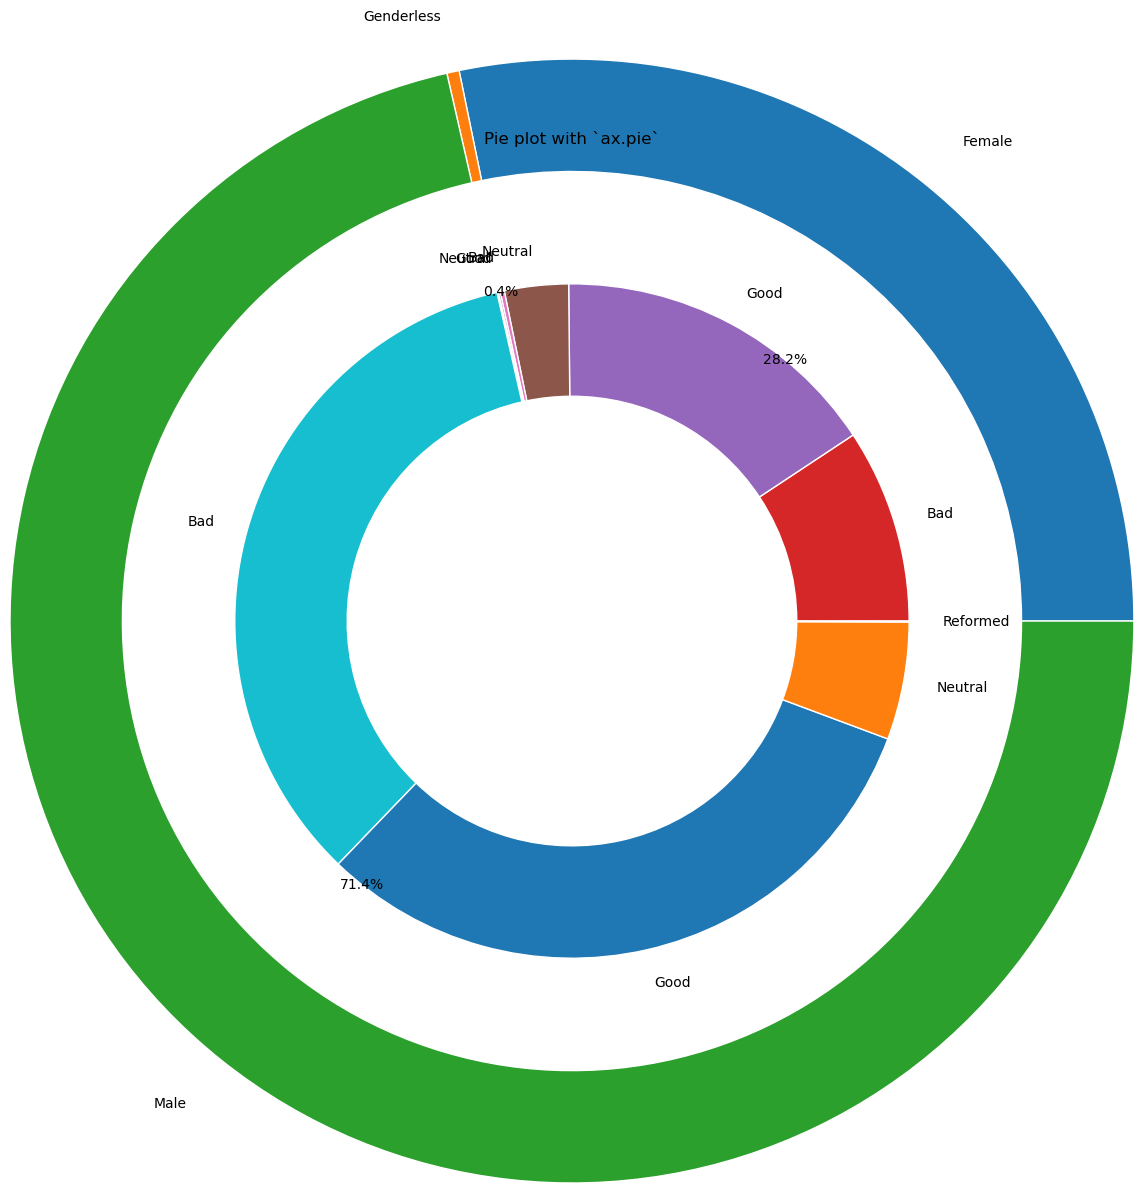

In [22]:
#Now you can turn the above values into one-dimensional arrays and plug them into your plot calls:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(outer.values.flatten(), radius=1.5, labels=outer.index,    autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1.2-size,  labels = inner_labels,   wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [ ]:
# example3

In [23]:
df=pd.DataFrame({'x':['Market A', 'Market B', 'Market C'],
 'y':[45, 35, 20]})
df

,x,y
0,Market A,45
1,Market B,35
2,Market C,20


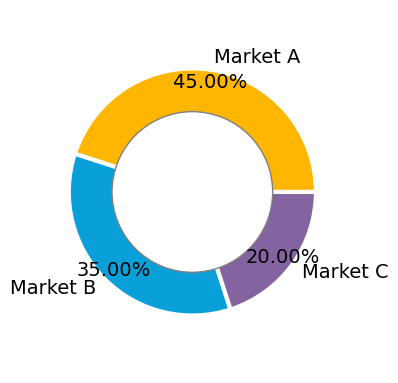

In [29]:
plt.figure(figsize=(4, 4)) # change the size of a figure
# The slices will be ordered and plotted counter-clockwise.
labels = df['x']
sizes = df['y']
colors = ['#FFB600', '#09A0DA','#8464a0'] #define colors of three donut pieces
explode = (0, 0, 0) # explode a slice if required
textprops = {'fontsize':14,'color':'black'} # Font size of text in donut chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
 autopct='%.2f%%', # Show data in 0.00%
 pctdistance =0.9, shadow=False, textprops =textprops, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
 
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.65,color='grey', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') # Set aspect ratio to be equal so that pie is      drawn as a circle.
plt.show();

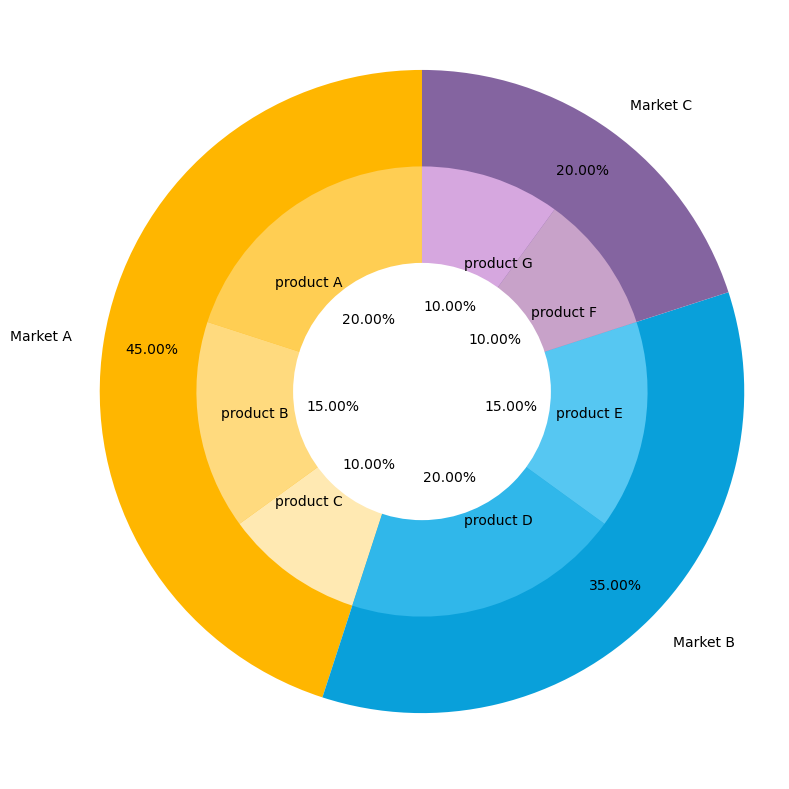

In [32]:
# create subgroup data
#https://python.plainenglish.io/how-to-make-a-beautiful-donut-chart-and-nested-donut-chart-in-matplotlib-92040c8bbeea
plt.figure(figsize=(8, 8)) # change the size of a figure
labels = df['x']
sizes = df['y']
colors = ['#FFB600', '#09A0DA','#8464a0']
labels_subgroup = ['product A', 'product B', 'product C', 'product D', 'product E', 'product F', 'product G']
sizes_subgroup = [20, 15, 10, 20, 15, 10, 10]
colors_subgroup = ['#FFCE53','#FFDA7E', '#FFE9B2', '#30B7EA',  '#56C7F2', '#C8A2C9','#D6A7DF']
 
outside_donut = plt.pie(sizes, labels=labels, colors=colors, startangle=90, frame=True,  autopct='%.2f%%',  pctdistance =0.85)
inside_donut = plt.pie(sizes_subgroup, labels=labels_subgroup,  colors=colors_subgroup, radius=0.7,  startangle=90, labeldistance=0.6,
 autopct='%.2f%%',  pctdistance =0.4)
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [51]:
labels_subgroup1 = ['product A', 'product B', 'product C', 'product D', 'product E', 'product F', 'product G']
sizes_subgroup1 = [20, 15, 10, 20, 15, 10, 10]
colors_subgroup1 = ['#FFCE53','#FFDA7E', '#FFE9B2', '#30B7EA',  '#56C7F2', '#C8A2C9','#D6A7DF']

labels_subgroup2 = ['product A1', 'product A2' 'product B1', 'product C1', 'product C2', 'product C3', 'product D1', 'product E1', 'product F1', 'product G1']
sizes_subgroup2 = [15,5,15, 10, 10, 6, 4, 15, 10]
colors_subgroup2 = ['red', 'red', 'red','red', 'red', 'red', 'green', 'red', 'red']

print(labels_subgroup1, sizes_subgroup1, colors_subgroup1)
print(labels_subgroup2, sizes_subgroup2, colors_subgroup2)
print(len(labels_subgroup2), len(sizes_subgroup2), len(colors_subgroup2))

['product A', 'product B', 'product C', 'product D', 'product E', 'product F', 'product G'] [20, 15, 10, 20, 15, 10, 10] ['#FFCE53', '#FFDA7E', '#FFE9B2', '#30B7EA', '#56C7F2', '#C8A2C9', '#D6A7DF']
['product A1', 'product A2product B1', 'product C1', 'product C2', 'product C3', 'product D1', 'product E1', 'product F1', 'product G1'] [15, 5, 15, 10, 10, 6, 4, 15, 10] ['red', 'red', 'red', 'red', 'red', 'red', 'green', 'red', 'red']
9 9 9


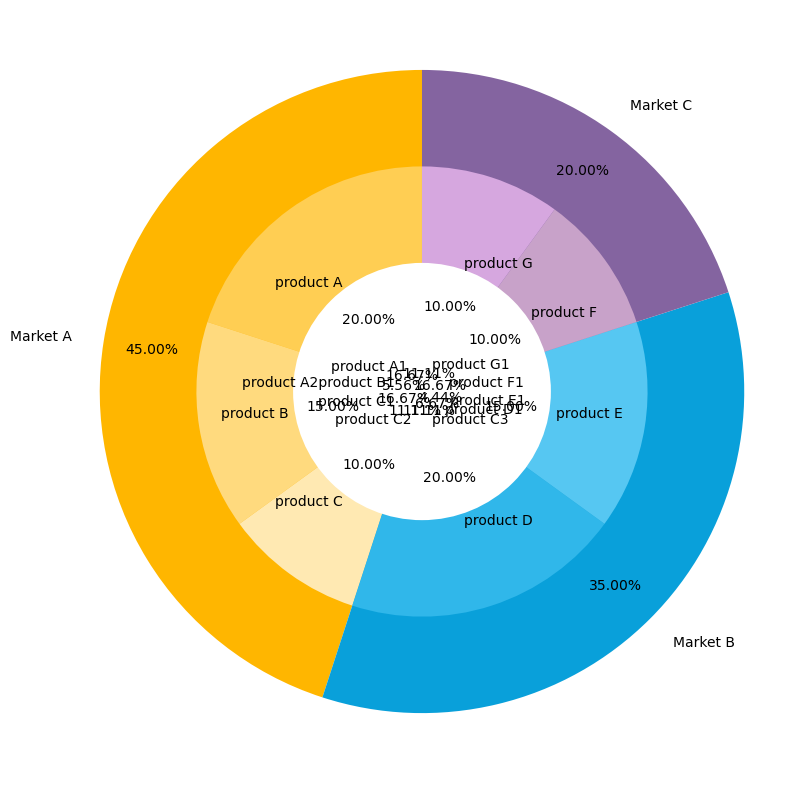

In [52]:
# create subgroup data
#https://python.plainenglish.io/how-to-make-a-beautiful-donut-chart-and-nested-donut-chart-in-matplotlib-92040c8bbeea
plt.figure(figsize=(8, 8)) # change the size of a figure
labels = df['x']
sizes = df['y']
colors = ['#FFB600', '#09A0DA','#8464a0']
labels_subgroup1 = ['product A', 'product B', 'product C', 'product D', 'product E', 'product F', 'product G']
sizes_subgroup1 = [20, 15, 10, 20, 15, 10, 10]
colors_subgroup1 = ['#FFCE53','#FFDA7E', '#FFE9B2', '#30B7EA',  '#56C7F2', '#C8A2C9','#D6A7DF']

#labels_subgroup2 = ['product A1', 'product A2' 'product B1', 'product C1', 'product C2', 'product C3', 'product D1', 'product E1', 'product F1', 'product G1']
#sizes_subgroup2 = [15,5, 15, 10, 10, 6, 4, 15, 10, 10]
#colors_subgroup2 = ['#FFCE53','#FFCE54', '#FFDA7E', '#FFE9B3', '#FFE9B4','#FFE9B5' '#30B7EA', '#56C7F2', '#C8A2C9', '#D6A7DF']
 

outside_donut = plt.pie(sizes, labels=labels, colors=colors, startangle=90, frame=True,  autopct='%.2f%%',  pctdistance =0.85)
inside_donut = plt.pie(sizes_subgroup1, labels=labels_subgroup1,  colors=colors_subgroup1, radius=0.7,  startangle=90, labeldistance=0.6,
 autopct='%.2f%%',  pctdistance =0.4)
inner_donut = plt.pie(sizes_subgroup2, labels=labels_subgroup2,  colors=colors_subgroup2, radius=0.3,  startangle=90, labeldistance=0.3,
 autopct='%.2f%%',  pctdistance =0.2)

centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()